In [6]:
# 필요한 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(60000, 785)

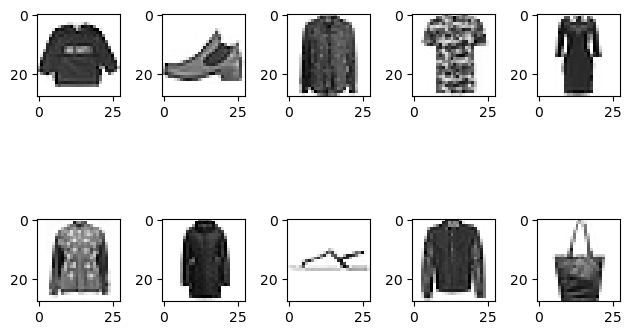

In [20]:
# Raw Data Set
df = pd.read_csv('./Data/fashion-mnist_train.csv')
display(df.head(), df.shape) # (60000, 785)

# 이미지 확인
img_data = df.drop('label', axis=1, inplace=False).values

# 그림을 확인해 보자.
fig = plt.figure()
fig_arr = []

# interpolation은 보간법을 뜻하며, 픽셀들의 축 위치 간격을 보정하여 이미지가 자연스러운 모양으로 
# 보일 수 있게 하는 방법입니다. 
# imshow()에서는 16가지 보간법이 있고, 'nearest'는 가장 고해상도인 보간법입니다.

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    
plt.tight_layout()
plt.show()

In [21]:
# 이 데이터로 머신러닝을 해보자
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Train Data Set

# 1. 학습데이터와 테스트데이터 분리
x_data_train , x_data_test, t_data_train, t_data_test =\
train_test_split(df.drop('label', axis=1, inplace=False).values,
                df['label'].values,
                test_size=0.2)

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

# one-hot 처리는 keras를 이용하자

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping  # epoch 조기 종료 기능

# Model
model = Sequential()

# Model에 layer 추가

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer ( Hidden Layer의 activation은 relu로 잡아줘야된다.)
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(64, activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

print(model.summary)

my_early_stopping = EarlyStopping(monitor='val_loss', # loss값이 떨어져야 좋아지는 건데 안떨어지면 안좋다.
                                 patience=3,         # 이 loss값을 기준으로 해서 감시할꺼다.
                                 mode='auto',        # patience는 loss가 안떨어질 경우 참는 횟수
                                 restore_best_weights=True,
                                 verbose=1)
# verbose=1 하면 가장 좋은 epoch를 알 수 있다.
#e best epoch: 40.
#384/384 [==============================] - 1s 3ms/step 
#- loss: 0.2319 - accuracy: 0.9149 - val_loss: 0.3117 - val_accuracy: 0.8924

# Model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Model 학습
# 1.번 로직
# model.fit(x_data_train_norm,
#          t_data_train,
#          epochs=50,
#          validation_split=0.2,
#          verbose=1,
#          batch_size=100)

# 2번 로직
history = model.fit(x_data_train_norm,
         t_data_train,
         epochs=50,
         validation_split=0.2,
         verbose=1,
         callbacks=[my_early_stopping],
         batch_size=100)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x28470ad60>>
Epoch 1/50
384/384 [==============================] - 1s 3ms/step - loss: 1.1594 - accuracy: 0.6018 - val_loss: 0.6299 - val_accuracy: 0.7827
Epoch 2/50
384/384 [==============================] - 1s 3ms/step - loss: 0.6722 - accuracy: 0.7664 - val_loss: 0.5229 - val_accuracy: 0.8186
Epoch 3/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5684 - accuracy: 0.8005 - val_loss: 0.4696 - val_accuracy: 0.8384
Epoch 4/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5153 - accuracy: 0.8193 - val_loss: 0.4403 - val_accuracy: 0.8441
Epoch 5/50
384/384 [==============================] - 1s 3ms/step - loss: 0.4831 - accuracy: 0.8312 - val_loss: 0.4236 - val_accuracy: 0.8516
Epoch 6/50
384/384 [==============================] - 1s 2ms/step - loss: 0.4591 - accuracy: 0.8377 - val_loss: 0.4018 - val_accuracy: 0.8557
Epoch 7/50
384/384 [==============================] - 1s 

/var/folders/kk/xrz15qhn0mq4cqrn3dp9c0m40000gn/T/ipykernel_8784/691290752.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


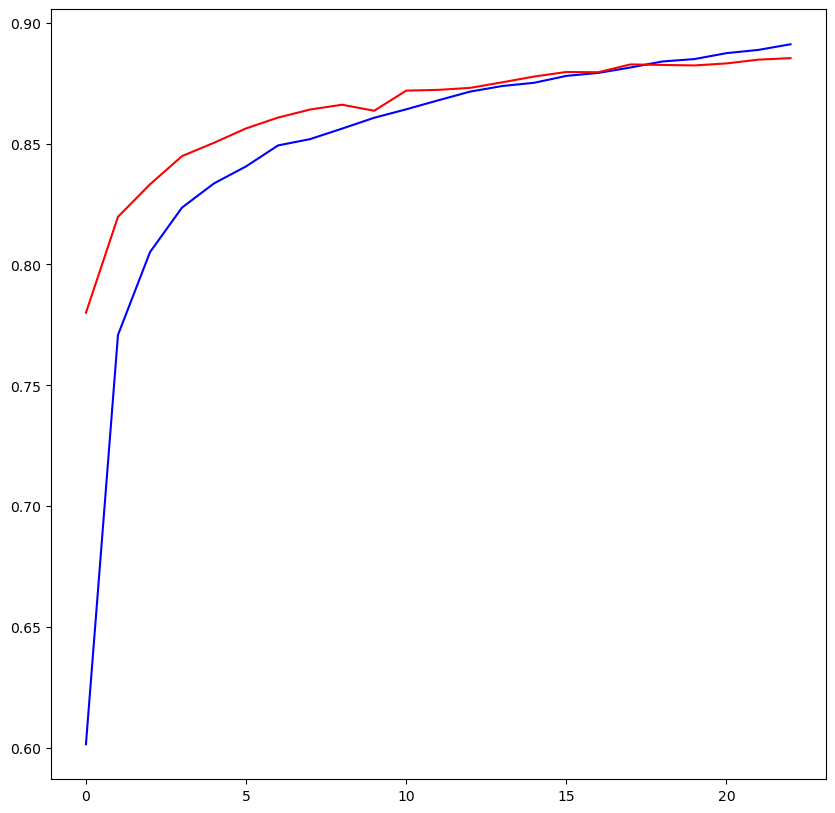

In [31]:
# 학습과정을 그래프로 한번 살펴보자
import matplotlib.pyplot as plt

fig =plt.figure(figsize=(10,10))

fig_acc = fig.add_subplot(1,1,1) # 전체를 내가 그릴 서브플랏으로 정한다는 의미,
                                 #()안의 숫자는 1행 1열 1번째 플랏이라는 의미
    
# epoch이 증가 할 때마다 나오는 accuracy, val_accuracy를 그래프로 그려보자.
fig_acc.plot(history.history['accuracy'],color='b') # history로 정한거 안에 history가 또 있다.
fig_acc.plot(history.history['val_accuracy'],color='r')
# 학습 데이터로 평가 : b, 진짜 평가에 대한 정보 : r
# 학습 데이터는 계속 평가를 진행하니 점점 더 좋아 질 수 밖에 없다.
# 우리가 목표로 봐야하는 데이터는 평가 데이터를 봐야한다.
# 평가 데이터가 증가하다 어느 순간부터 정체 현상이 발생한다.
# 정체 순간부터는 Overfitting이 발생되어 더이상 좋아지지 않는다는 의미다.

fig.show()

In [32]:
#우리 모델에 대한 마지막 평가
print(model.evaluate(x_data_test_norm,t_data_test))

375/375 [==============================] - 0s 540us/step - loss: 0.3188 - accuracy: 0.8818
[0.3187818229198456, 0.8818333148956299]


In [24]:
# 이미지가 복잡해 질때 정확도가 얼마나 떨어지는지 확인해보자
# 84% 정도 나온다
# 결론을 말하면
# 비정형데이터는 일반 머신러닝 기법을 이용하면 학습에 효율이 떨어진다. 
# 학습의 정확도가 많이 떨어진다.
# => NN

In [ ]:
#  Overfitting이 발생하지 않는 순간을 알지 못 해 
# epochs을 몇번 돌려야 할 지 알 지 못한다.
# 그래프는 우리가 학습이 완료된 후에 나오는 결과이기 때문에 몇 번을 돌려야할 지 짐작하기 힘들다.
# 그러면 어떻게 해야 될까?
# 직감적으로 질러서 해야하나? 
# 지금은 데이터량이 적어서 시간이 오래 걸리지 않는다. 지금은 수작업이 가능하다
# 하지만 데이터량이 커지면 학습에 시간이 오래 걸리게 된다. 이런 경우 수작업은 불가능하다!
# 그렇기 때문에 자동으로 어떤 조건을 만족하면 epochs을 자동으로 끊어주는 모듈이 필요하다!!
# 그래서 자동으로 Epochs을 진행하는 machanism이 필요하고 이것을
# keras가 Early Stopping 기능을 제공
# 위쪽 코드에 적용해 보자.